In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [4]:
df = pd.read_csv("bank.csv", sep = ";")

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [66]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.isnull().any().sum() #no null values

0

In [10]:
df.duplicated().any() #no duplicates

False

In [11]:
#checking of for the balance of data
df['y'].value_counts() #Imabalanced of data

no     4000
yes     521
Name: y, dtype: int64

In [12]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [13]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [14]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [15]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [16]:
df.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [17]:
df.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [18]:
df.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [19]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

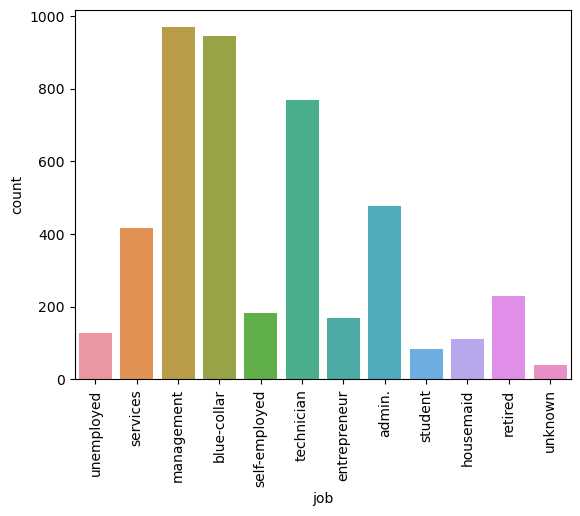

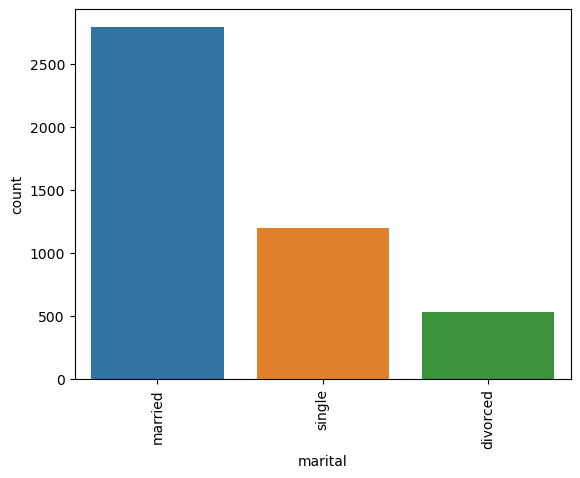

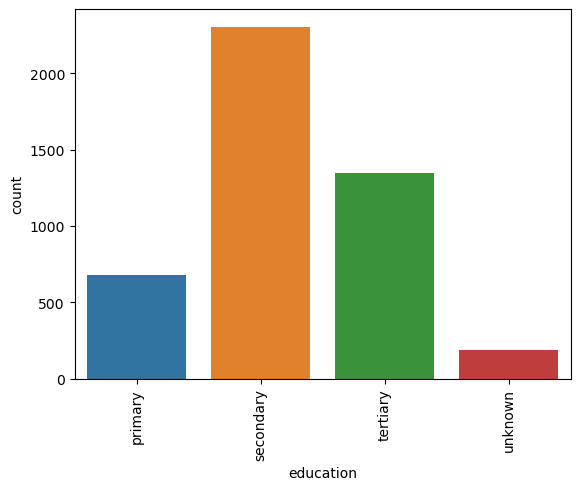

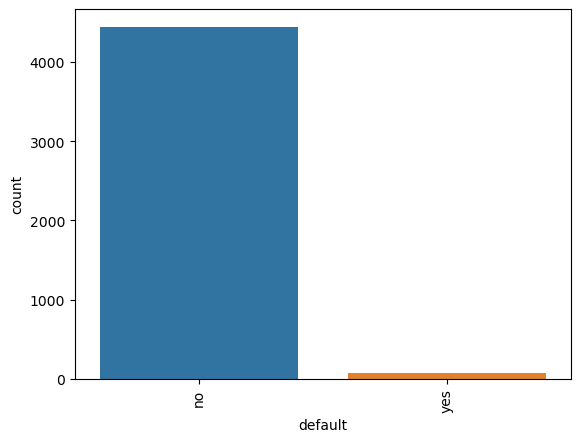

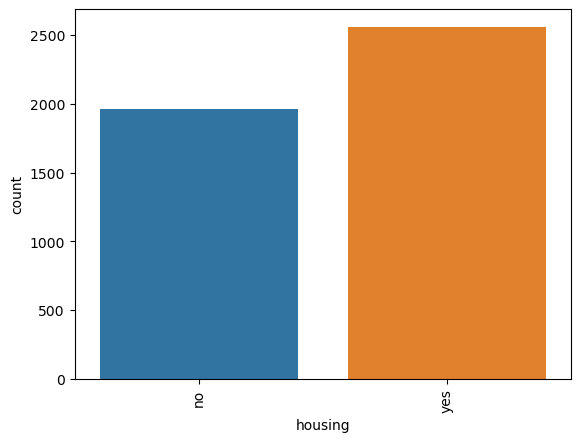

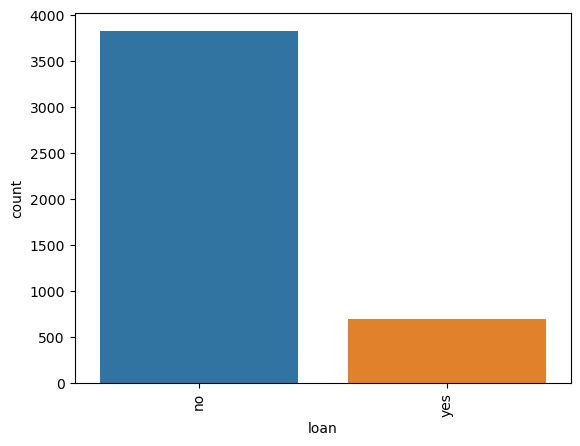

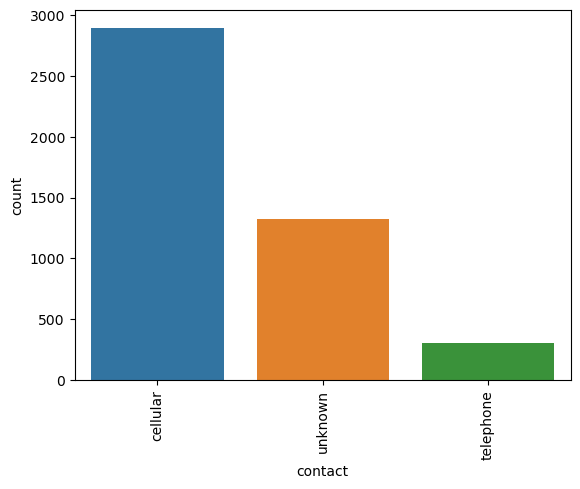

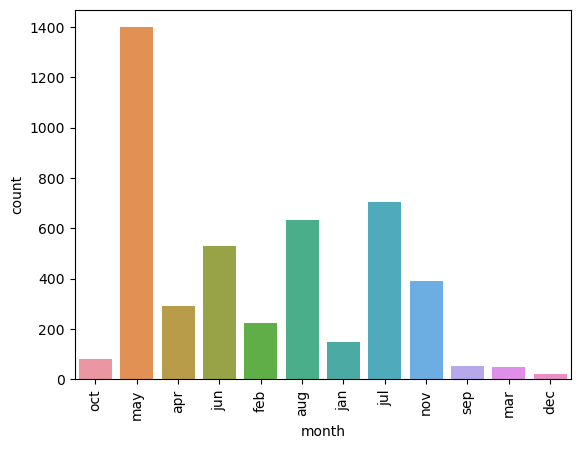

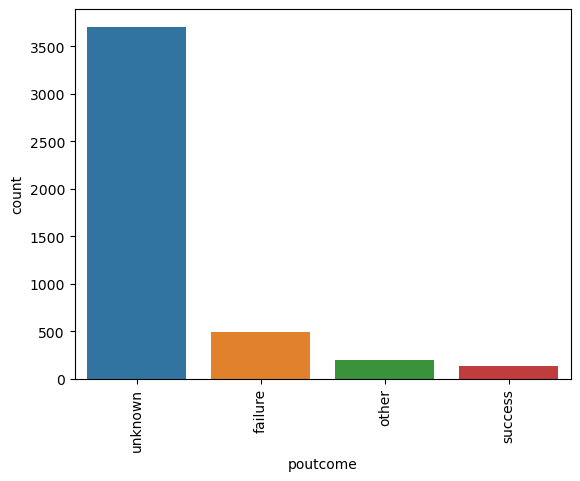

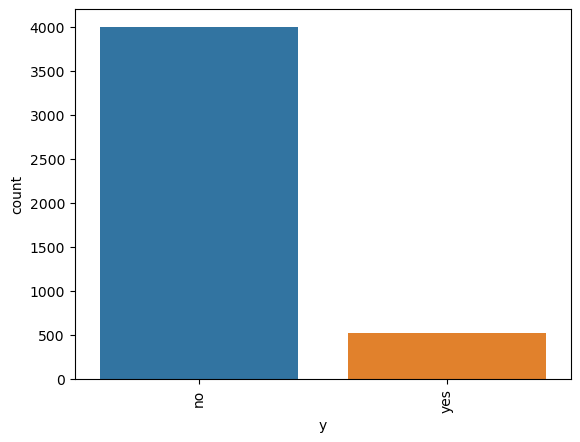

In [21]:
#EDA 
cat_val = df.iloc[:,[1,2,3,4,6,7,8,10,15,16]]

for i, col in enumerate(cat_val.columns):
    plt.figure(i)
    sns.countplot(cat_val[col])
    plt.xticks(rotation=90)


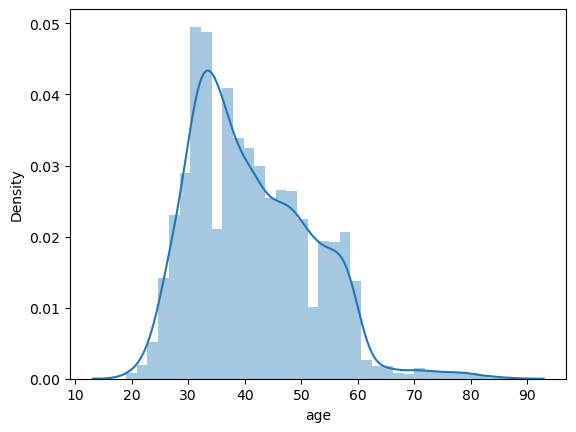

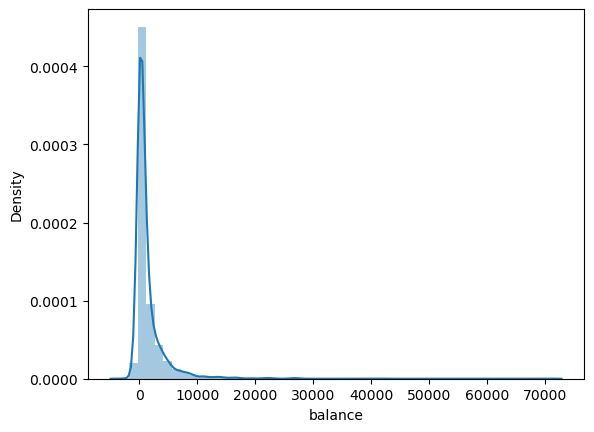

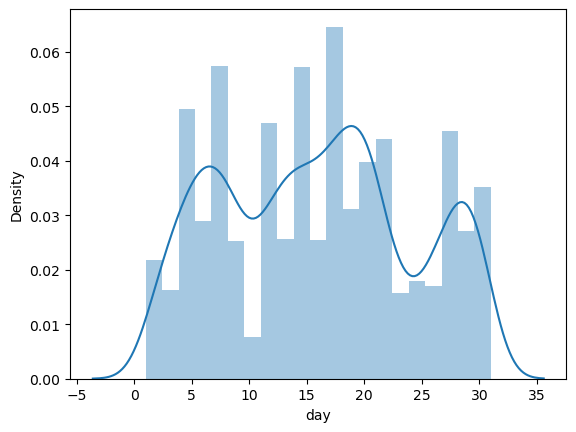

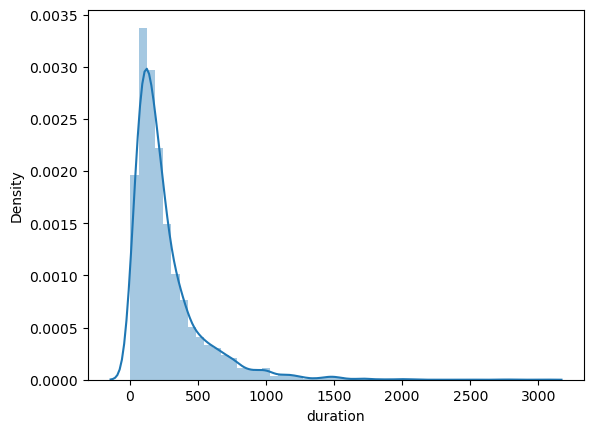

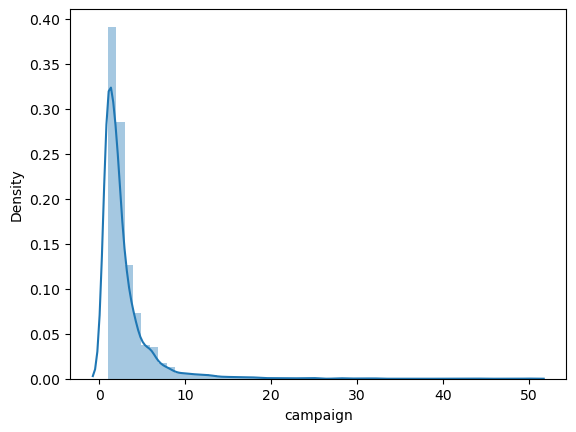

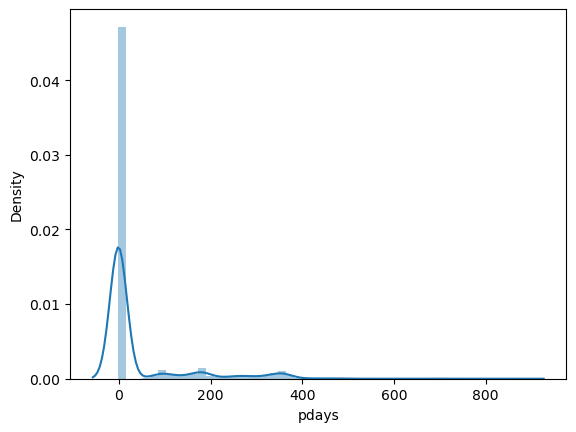

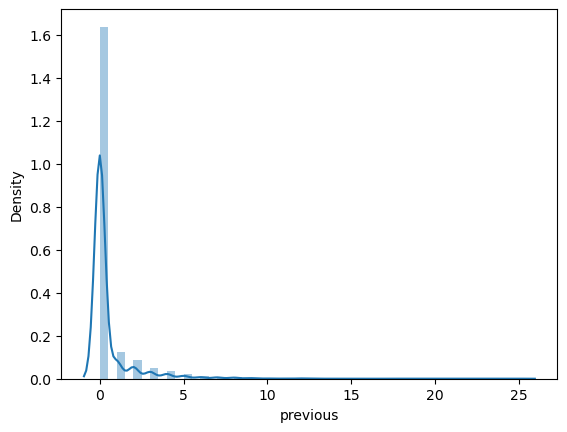

In [22]:
df_num = df.iloc[:,[0,5,9,11,12,13,14]]
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])


In [24]:
#creating label encoder
labelencoder =  LabelEncoder()

In [25]:
cat_val = df.iloc[:,[1,2,3,4,6,7,8,10,15,16]]

In [26]:
cat_val['job']=labelencoder.fit_transform(cat_val['job'])
cat_val['marital']=labelencoder.fit_transform(cat_val['marital'])
cat_val['education']=labelencoder.fit_transform(cat_val['education'])
cat_val['default']=labelencoder.fit_transform(cat_val['default'])
cat_val['housing']=labelencoder.fit_transform(cat_val['housing'])
cat_val['loan']=labelencoder.fit_transform(cat_val['loan'])
cat_val['contact']=labelencoder.fit_transform(cat_val['contact'])
cat_val['month']=labelencoder.fit_transform(cat_val['month'])
cat_val['poutcome']=labelencoder.fit_transform(cat_val['poutcome'])
cat_val['y']=labelencoder.fit_transform(cat_val['y'])


In [27]:
df1 = pd.concat([df_num, cat_val], axis = 1)

In [28]:
df1

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,7,1,1,0,1,0,0,5,3,0
4517,57,-3313,9,153,1,-1,0,6,1,2,1,1,1,2,8,3,0
4518,57,295,19,151,11,-1,0,9,1,1,0,0,0,0,1,3,0
4519,28,1137,6,129,4,211,3,1,1,1,0,0,0,0,3,1,0


<AxesSubplot:>

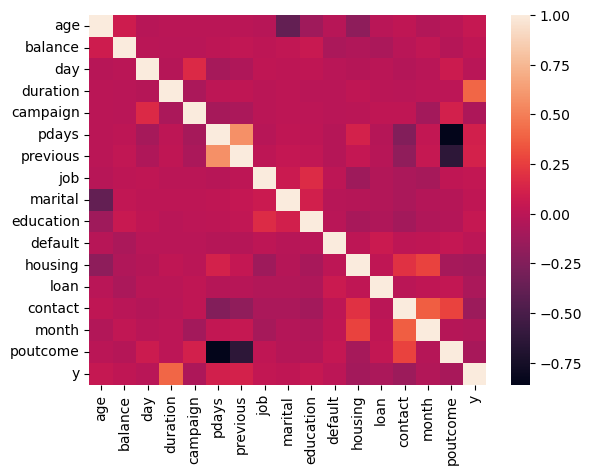

In [67]:
sns.heatmap(df1.corr())

In [29]:
#Its highly imbalanced data so lets use SMOTE technique to balance the data

In [30]:
X =df1.drop("y", axis = 1)
y = df1["y"]

In [31]:
smt = SMOTETomek(sampling_strategy = "not majority", random_state=100)
X1, y1 = smt.fit_resample(X, y)

In [32]:
X1.shape , y1.shape

((7748, 16), (7748,))

In [33]:
#standarization   #mean=0 , std=1
def norm_func(i):
    x = (i-i.mean())/(i.std()) 
    return(x)
df2 = norm_func(X1)

In [34]:
final = pd.concat([df2,y1], axis = 1)

In [35]:
final

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,-1.074135,0.124214,0.422748,-0.884989,-0.549595,-0.487783,-0.398512,1.927765,-0.050335,-1.618657,-0.098192,-0.819477,-0.313642,-0.564921,1.640509,0.582795,0
1,-0.792707,1.242287,-0.617160,-0.486186,-0.549595,2.813377,1.973425,0.906292,-0.050335,-0.192206,-0.098192,1.220133,3.187939,-0.564921,0.957910,-2.320437,0
2,-0.605088,-0.038544,0.032782,-0.585180,-0.549595,2.725993,0.194472,-0.115182,1.616327,1.234244,-0.098192,1.220133,-0.313642,-0.564921,-1.772482,-2.320437,0
3,-1.074135,0.008384,-1.657069,-0.545582,0.592744,-0.487783,-0.398512,-0.115182,-0.050335,1.234244,-0.098192,1.220133,3.187939,2.022729,0.275312,0.582795,0
4,1.646339,-0.541342,-1.397092,-0.469216,-0.549595,-0.487783,-0.398512,-1.136655,-0.050335,-0.192206,-0.098192,1.220133,-0.313642,2.022729,0.957910,0.582795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7743,-0.886516,-0.491062,-1.267103,-0.517299,-0.549595,-0.487783,-0.398512,1.246783,-0.050335,-0.192206,-0.098192,-0.819477,-0.313642,-0.564921,0.957910,0.582795,1
7744,-0.136041,-0.540970,0.812714,-0.350424,-0.549595,1.619134,1.380441,0.225310,-0.050335,-0.192206,-0.098192,-0.819477,-0.313642,-0.564921,-1.089884,-1.352693,1
7745,-0.511278,1.364821,0.422748,-0.452246,1.354304,1.026867,1.973425,0.225310,-1.716998,1.234244,-0.098192,-0.819477,-0.313642,-0.564921,-1.089884,-2.320437,1
7746,-0.792707,-0.486593,-1.007126,-0.537097,-0.549595,-0.487783,-0.398512,0.225310,-1.716998,-0.192206,-0.098192,-0.819477,-0.313642,-0.564921,0.616611,0.582795,1


In [36]:
X2 = final.drop(["y"], axis = 1)
y2 = final['y']

In [37]:
X2.shape , y2.shape

((7748, 16), (7748,))

In [38]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

## Logistic Regression 

In [39]:
# Fitting on  Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)
# predictions on test data
y_pred = clf.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1_score:", precision_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8548387096774194
Precision: 0.8435374149659864
Recall: 0.8493150684931506
F1_score: 0.8435374149659864
AUC-ROC: 0.854535583027063


## K Nearest Neighbours

In [40]:
#Fitting on KNN
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(X_train, y_train)
#predictions on test data
y_pred1 = clf1.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1_score:", precision_score(y_test, y_pred1))
print("AUC-ROC:", roc_auc_score(y_test, y_pred1))

Accuracy: 0.8877419354838709
Precision: 0.8518987341772152
Recall: 0.9219178082191781
F1_score: 0.8518987341772152
AUC-ROC: 0.8896174406949549


## Decision Tree

In [41]:
#Fitting on decision tree
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)
#predictions on test data
y_pred2 = clf2.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1_score:", precision_score(y_test, y_pred2))
print("AUC-ROC:", roc_auc_score(y_test, y_pred2))

Accuracy: 0.8870967741935484
Precision: 0.8627450980392157
Recall: 0.9041095890410958
F1_score: 0.8627450980392157
AUC-ROC: 0.8880304042766456


# Random Forest Tree

In [42]:
#Fitting on random forest tree
clf3 = RandomForestClassifier(n_estimators=100)
clf3.fit(X_train, y_train)
#predictions on test data
y_pred3 = clf3.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))
print("F1_score:", precision_score(y_test, y_pred3))
print("AUC-ROC:", roc_auc_score(y_test, y_pred3))

Accuracy: 0.9329032258064516
Precision: 0.9129287598944591
Recall: 0.947945205479452
F1_score: 0.9129287598944591
AUC-ROC: 0.9337287003007017


# Support vector machine

In [43]:
#Fitting on Support vector machine
clf4 = SVC()
clf4.fit(X_train, y_train)
#predictions on test data
y_pred4 = clf4.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Precision:", precision_score(y_test, y_pred4))
print("Recall:", recall_score(y_test, y_pred4))
print("F1_score:", precision_score(y_test, y_pred4))
print("AUC-ROC:", roc_auc_score(y_test, y_pred4))

Accuracy: 0.9
Precision: 0.891156462585034
Recall: 0.8972602739726028
F1_score: 0.891156462585034
AUC-ROC: 0.8998496491814234


# Naive Bayes 

In [44]:
#Fitting Naive Bayes model 
clf5 = GaussianNB()
clf5.fit(X_train, y_train)
#predictions on test data
y_pred5 = clf5.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))
print("Recall:", recall_score(y_test, y_pred5))
print("F1_score:", precision_score(y_test, y_pred5))
print("AUC-ROC:", roc_auc_score(y_test, y_pred5))

Accuracy: 0.7296774193548388
Precision: 0.6468366383380547
Recall: 0.9383561643835616
F1_score: 0.6468366383380547
AUC-ROC: 0.741129301703976


# Gradient Boosting

In [45]:
# Fitting Gradient Boosting Classifier
clf6 = GradientBoostingClassifier()
clf6.fit(X_train, y_train)
#predictions on test data
y_pred6 = clf6.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))
print("Recall:", recall_score(y_test, y_pred5))
print("F1_score:", precision_score(y_test, y_pred5))
print("AUC-ROC:", roc_auc_score(y_test, y_pred5))

Accuracy: 0.7296774193548388
Precision: 0.6468366383380547
Recall: 0.9383561643835616
F1_score: 0.6468366383380547
AUC-ROC: 0.741129301703976


# Hyperparameter for each model

In [46]:
# Fitting on  Logistic Regression model
param = LogisticRegression(penalty='l2', C=3.0, solver='lbfgs', max_iter=2000)
param.fit(X_train, y_train)
# predictions on test data
y_pred_param = param.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param))
print("Precision:", precision_score(y_test, y_pred_param))
print("Recall:", recall_score(y_test, y_pred_param))
print("F1_score:", precision_score(y_test, y_pred_param))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param))

Accuracy: 0.8541935483870968
Precision: 0.8433242506811989
Recall: 0.8479452054794521
F1_score: 0.8433242506811989
AUC-ROC: 0.8538506515202139


In [47]:
#Fitting on KNN
param1 = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto', metric='minkowski')
param1.fit(X_train, y_train)
#predictions on test data
y_pred_param1 = param1.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param1))
print("Precision:", precision_score(y_test, y_pred_param1))
print("Recall:", recall_score(y_test, y_pred_param1))
print("F1_score:", precision_score(y_test, y_pred_param1))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param1))

Accuracy: 0.8890322580645161
Precision: 0.8963068181818182
Recall: 0.8643835616438356
F1_score: 0.8963068181818182
AUC-ROC: 0.8876795856999665


In [48]:
#Fitting on decision tree
param2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=50, min_samples_split=5, min_samples_leaf=1)
param2.fit(X_train, y_train)
#predictions on test data
y_pred_param2 = param2.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param2))
print("Precision:", precision_score(y_test, y_pred_param2))
print("Recall:", recall_score(y_test, y_pred_param2))
print("F1_score:", precision_score(y_test, y_pred_param2))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param2))

Accuracy: 0.8961290322580645
Precision: 0.8860244233378561
Recall: 0.8945205479452055
F1_score: 0.8860244233378561
AUC-ROC: 0.8960407617774808


In [49]:
#Fitting on random forest tree
param3 = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, max_features='auto',
                                bootstrap=True, oob_score=False)
param3.fit(X_train, y_train)
#predictions on test data
y_pred_param3 = param3.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param3))
print("Precision:", precision_score(y_test, y_pred_param3))
print("Recall:", recall_score(y_test, y_pred_param3))
print("F1_score:", precision_score(y_test, y_pred_param3))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param3))

Accuracy: 0.9348387096774193
Precision: 0.918774966711052
Recall: 0.9452054794520548
F1_score: 0.918774966711052
AUC-ROC: 0.935407617774808


In [50]:
#Fitting Naive Bayes model 
param5 = GaussianNB()
param5.fit(X_train, y_train)
#predictions on test data
y_pred_param5 = param5.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param5))
print("Precision:", precision_score(y_test, y_pred_param5))
print("Recall:", recall_score(y_test, y_pred_param5))
print("F1_score:", precision_score(y_test, y_pred_param5))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param5))

Accuracy: 0.7296774193548388
Precision: 0.6468366383380547
Recall: 0.9383561643835616
F1_score: 0.6468366383380547
AUC-ROC: 0.741129301703976


In [51]:
# Fitting Gradient Boosting Classifier
param6 = GradientBoostingClassifier(loss='deviance',
                                     learning_rate=0.5,
                                     n_estimators=1000,
                                     criterion='friedman_mse',
                                     min_samples_split=5,
                                     min_samples_leaf=1,
                                     max_depth=5,
                                     random_state=0)
param6.fit(X_train, y_train)
#predictions on test data
y_pred_param6 = param6.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param5))
print("Precision:", precision_score(y_test, y_pred_param5))
print("Recall:", recall_score(y_test, y_pred_param5))
print("F1_score:", precision_score(y_test, y_pred_param5))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param5))

Accuracy: 0.7296774193548388
Precision: 0.6468366383380547
Recall: 0.9383561643835616
F1_score: 0.6468366383380547
AUC-ROC: 0.741129301703976


# Best fit model is Random Forest Tree Model

In [52]:
#Fitting on random forest tree
param3 = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, max_features='auto',
                                bootstrap=True, oob_score=False)
param3.fit(X_train, y_train)
#predictions on test data
y_pred_param3 = param3.predict(X_test)
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_param3))
print("Precision:", precision_score(y_test, y_pred_param3))
print("Recall:", recall_score(y_test, y_pred_param3))
print("F1_score:", precision_score(y_test, y_pred_param3))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_param3))

Accuracy: 0.9335483870967742
Precision: 0.9163346613545816
Recall: 0.9452054794520548
F1_score: 0.9163346613545816
AUC-ROC: 0.934188105579686


In [53]:
# predicting the train label 
y_pred_train = param3.predict(X_train)

In [54]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3054
           1       1.00      1.00      1.00      3144

    accuracy                           1.00      6198
   macro avg       1.00      1.00      1.00      6198
weighted avg       1.00      1.00      1.00      6198



In [55]:
print(f1_score(y_train,y_pred_train,average='weighted'))

1.0


In [56]:
train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_pred_train)
print(train_fpr)
print(train_tpr)
print(train_threshold)

[0. 0. 1.]
[0. 1. 1.]
[2 1 0]


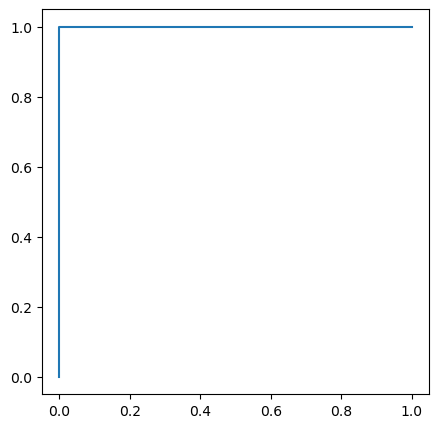

In [57]:
plt.figure(figsize=(5,5))
plt.plot(train_fpr,train_tpr)

In [58]:
#Now predicting on test data

In [59]:
y_pred_test = param3.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       820
           1       0.92      0.95      0.93       730

    accuracy                           0.93      1550
   macro avg       0.93      0.93      0.93      1550
weighted avg       0.93      0.93      0.93      1550



In [61]:
print(f1_score(y_test,y_pred_test,average='weighted'))

0.9335910899598903


In [62]:
train_fpr2,train_tpr2,train_threshold2 = roc_curve(y_test,y_pred_test)
print(train_fpr2)
print(train_tpr2)
print(train_threshold2)

[0.         0.07682927 1.        ]
[0.         0.94520548 1.        ]
[2 1 0]


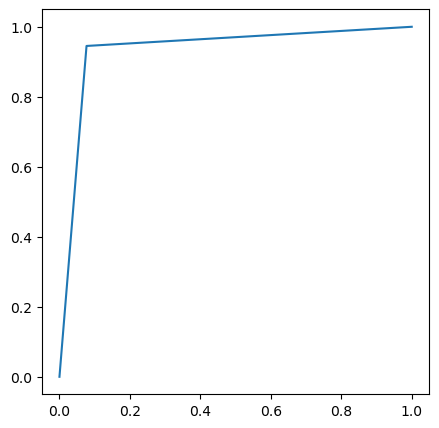

In [63]:
plt.figure(figsize=(5,5))
plt.plot(train_fpr2,train_tpr2)